In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Preparing metadata (setup.py) ... done


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ST1Capstone/chess_games.csv')

# EXPLORATORY DATA ANALYSIS


Model data

In [5]:
df

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense,NaN,NaN
20054,20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn,NaN,NaN
20055,20056,True,35,Mate,White,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,NaN,Mason Attack
20056,20057,True,109,Resign,White,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,4,Pirc Defense,Pirc Defense,NaN,NaN


In [6]:
df.shape

(20058, 17)

In [7]:
df.columns

Index(['game_id', 'rated', 'turns', 'victory_status', 'winner',
       'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_response',
       'opening_variation'],
      dtype='object')

In [8]:
df.nunique()

game_id              20058
rated                    2
turns                  211
victory_status           4
winner                   3
time_increment         400
white_id              9438
white_rating          1516
black_id              9331
black_rating          1521
moves                18920
opening_code           365
opening_moves           23
opening_fullname      1477
opening_shortname      128
opening_response         3
opening_variation      615
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

Plot data in graphs

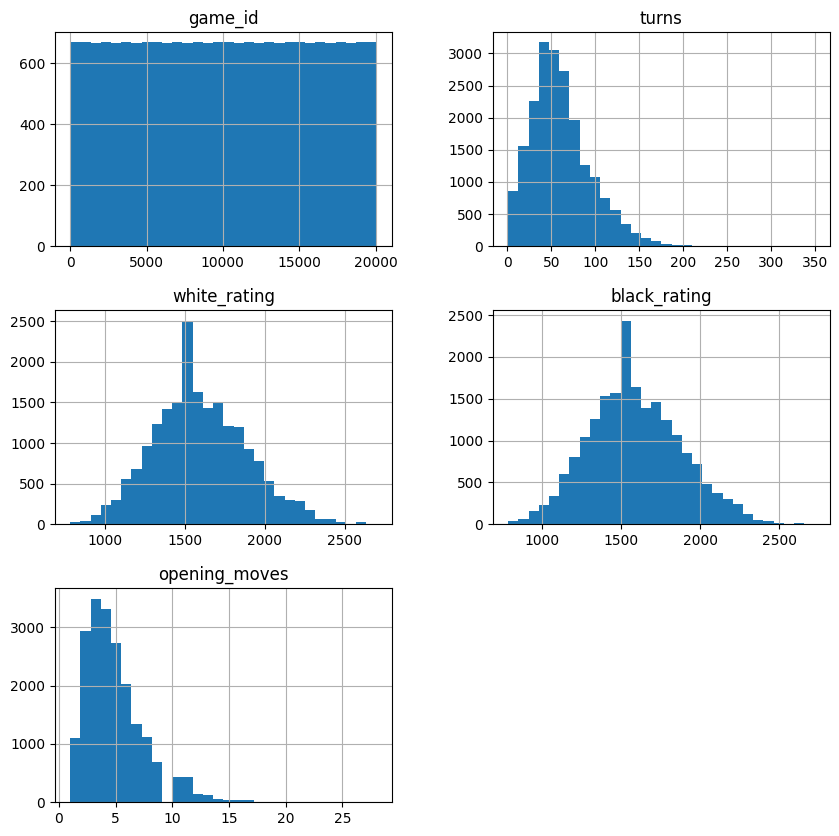

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df.hist(ax=ax, bins=30)
plt.show()

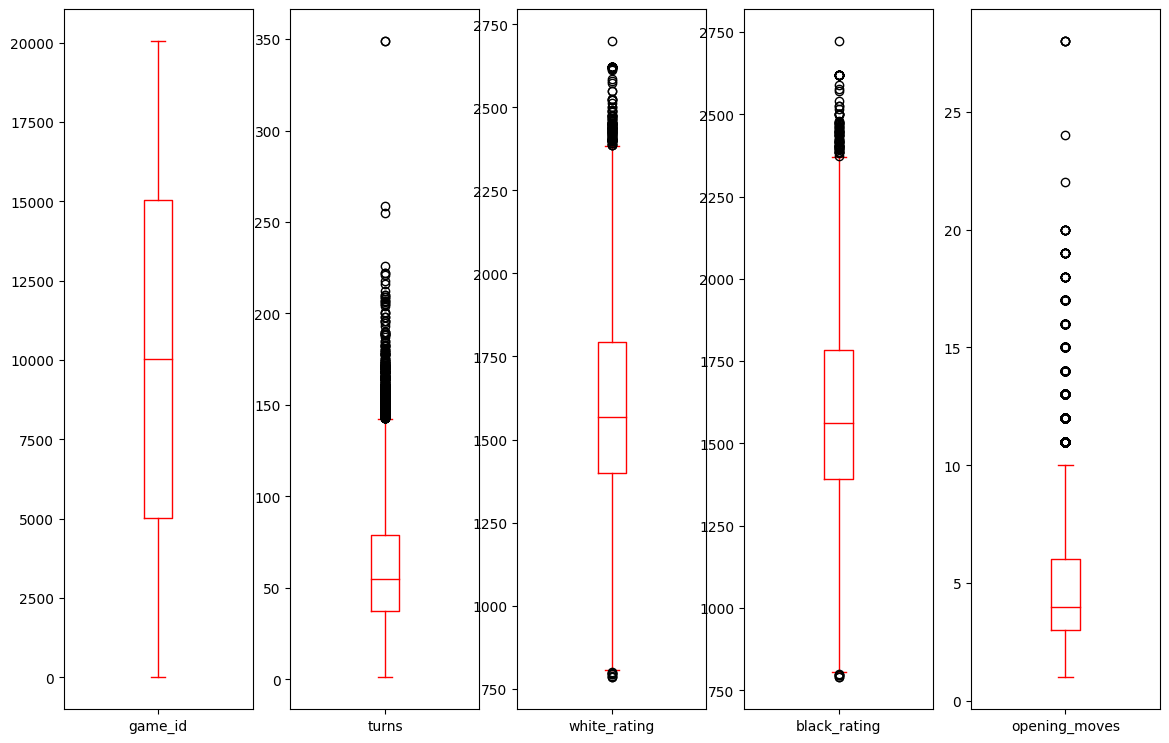

In [11]:
df.plot(kind='box', subplots=True,
        layout=(2,7),sharex=False,sharey=False, figsize=(20,20), color='red');

Drop extraneous columns

In [12]:
df = df.drop('game_id', axis=1)
df = df.drop('white_id', axis=1)
df = df.drop('black_id', axis=1)
df = df.drop('opening_fullname', axis=1)
df = df.drop('opening_code', axis=1)
#victory status is removed because otherwise it provides a guaranteed method for an algorithm to predict draws
df = df.drop('victory_status', axis=1)

#moves, turns are removed in order to facilitate a predictive application (in theory this is also correct with moves however none of the algorithms used understand the rules of chess well enough to actually use that)
#df = df.drop('moves', axis=1) 
#df = df.drop('turns', axis=1)

Drop duplicates

In [13]:
df = df.drop_duplicates(subset=df.columns.difference(['game_id']))

In [14]:
df = df.drop(df[df.turns >250].index, axis=0)

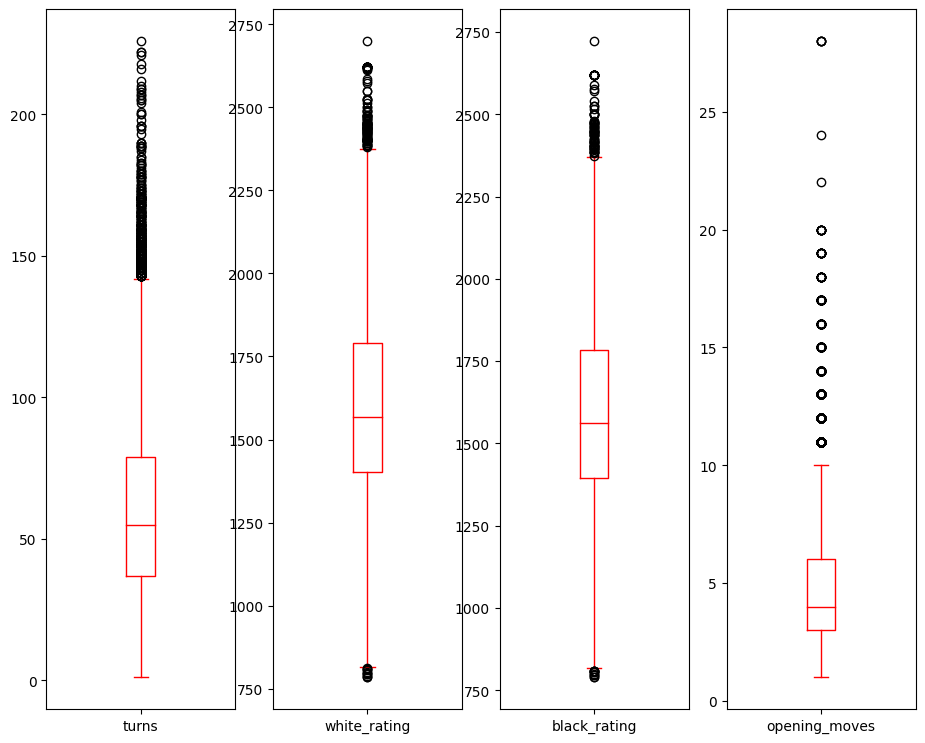

In [15]:
df.plot(kind='box', subplots=True,
        layout=(2,7),sharex=True,sharey=False, figsize=(20,20), color='red');

In [16]:
df.shape

(19109, 11)

Calculating result ratios

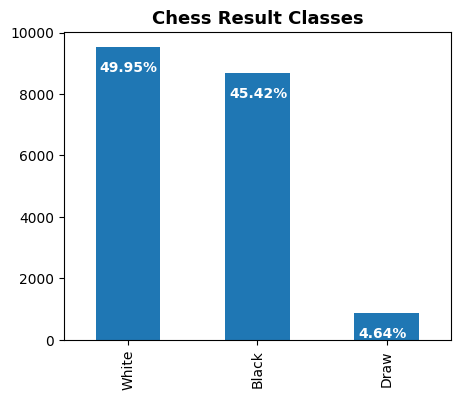

In [17]:
ax= plt.subplots(figsize=(5, 4))
name = ['White', 'Black', 'Draw']
ax=df.winner.value_counts().plot(kind='bar')
ax.set_xticklabels(name)
ax.set_title('Chess Result Classes', fontsize=13, weight='bold')

for i in ax.patches:
  ax.text(i.get_x()+0.03, i.get_height()-800, \
    str(round((i.get_height()/len(df))*100, 2))+'%', fontsize=10,
      color='white', weight = 'bold')


In [18]:
#profile = ProfileReport(df,title="Chess Results EDA",
  #html={'style':{'full_width':True}})
#profile.to_notebook_iframe()

# PREDICTIVE DATA ANALYSIS

PRE PROCESSING

In [19]:
#PDA pre processing imports
from sklearn.exceptions import DataDimensionalityWarning
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in df:
  if df[col].dtype =='object' or df[col].dtype == 'bool':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))

df

,rated,turns,winner,time_increment,white_rating,black_rating,moves,opening_moves,opening_shortname,opening_response,opening_variation
0,0.0,13,2.0,110.0,1500,1191,4522.0,5,110.0,NaN,181.0
1,1.0,16,0.0,298.0,1322,1261,1987.0,4,74.0,NaN,262.0
2,1.0,61,2.0,298.0,1496,1500,16381.0,3,61.0,NaN,298.0
3,1.0,61,2.0,187.0,1439,1454,3770.0,3,94.0,NaN,609.0
4,1.0,95,2.0,247.0,1523,1469,15620.0,5,83.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20053,1.0,24,2.0,21.0,1691,1220,6116.0,2,29.0,NaN,NaN
20054,1.0,82,0.0,19.0,1233,1196,5419.0,2,93.0,NaN,NaN
20055,1.0,35,2.0,19.0,1219,1286,3431.0,3,94.0,NaN,325.0
20056,1.0,109,2.0,19.0,1360,1227,11215.0,4,84.0,NaN,NaN


In [20]:
class_label =df['winner']
df = df.drop(['winner'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['winner']=class_label
df

,rated,turns,time_increment,white_rating,black_rating,moves,opening_moves,opening_shortname,opening_response,opening_variation,winner
0,0.0,0.053333,0.275689,0.373695,0.207859,0.239057,0.148148,0.866142,NaN,0.295269,2.0
1,1.0,0.066667,0.746867,0.280793,0.244054,0.105043,0.111111,0.582677,NaN,0.427406,0.0
2,1.0,0.266667,0.746867,0.371608,0.367632,0.865986,0.074074,0.480315,NaN,0.486134,2.0
3,1.0,0.266667,0.468672,0.341858,0.343847,0.199302,0.074074,0.740157,NaN,0.993475,2.0
4,1.0,0.417778,0.619048,0.385699,0.351603,0.825756,0.148148,0.653543,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...
20053,1.0,0.102222,0.052632,0.473382,0.222854,0.323324,0.037037,0.228346,NaN,NaN,2.0
20054,1.0,0.360000,0.047619,0.234342,0.210445,0.286477,0.037037,0.732283,NaN,NaN,0.0
20055,1.0,0.151111,0.047619,0.227035,0.256980,0.181381,0.074074,0.740157,NaN,0.530179,2.0
20056,1.0,0.480000,0.047619,0.300626,0.226474,0.592884,0.111111,0.661417,NaN,NaN,2.0


In [21]:
chess_data = df.copy()
le = preprocessing.LabelEncoder()
rated = le.fit_transform(list(chess_data["rated"]))
winner = le.fit_transform(list(chess_data["winner"])) #0 = black, 1=draw, 2=white
time_increment = le.fit_transform(list(chess_data["time_increment"]))
white_rating = le.fit_transform(list(chess_data["white_rating"]))
black_rating = le.fit_transform(list(chess_data["black_rating"]))
opening_moves = le.fit_transform(list(chess_data["opening_moves"])) #how many moves in the opening
moves = le.fit_transform(list(chess_data["moves"]))
turns = le.fit_transform(list(chess_data["turns"]))
opening_shortname = le.fit_transform(list(chess_data["opening_shortname"]))
opening_response = le.fit_transform(list(chess_data["opening_response"]))
opening_variation = le.fit_transform(list(chess_data["opening_variation"]))

In [22]:
#PDA imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

x = list(zip(rated, time_increment, white_rating, black_rating, turns, moves, opening_moves, opening_shortname, opening_response, opening_variation))
y = list(winner)

num_folds = 5
seed = 7
scoring = 'accuracy'

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=seed)

np.shape(x_train), np.shape(x_test)

((15287, 10), (3822, 10))

In [23]:
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB
sv = SVC()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

results = []
names=[]
print("Performance on training set:")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on training set:
DT: 0.542029 (0.010124)

NB: 0.591678 (0.008145)

SVM: 0.609602 (0.004640)

GBM: 0.696473 (0.006793)

RF: 0.620070 (0.008973)



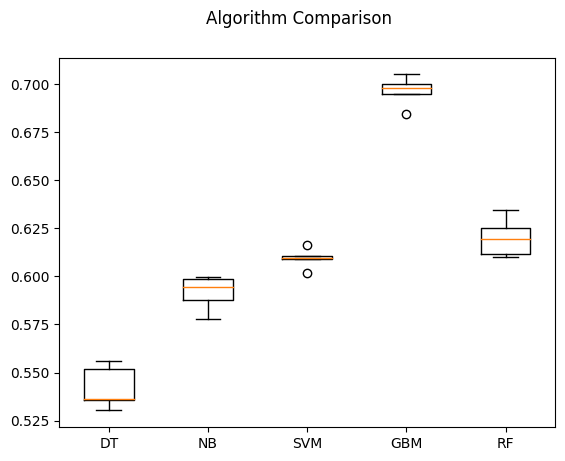

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
best_model = gb
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best model accuracy on test set:", accuracy_score(y_test, y_pred))

Best model accuracy on test set: 0.7085295656724229


Full Model Evaluation 1: Classification Report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1721
           1       0.09      0.01      0.01       176
           2       0.72      0.77      0.74      1925

    accuracy                           0.71      3822
   macro avg       0.50      0.50      0.49      3822
weighted avg       0.68      0.71      0.69      3822



Full Model Evaluation 2: Confusion Matrix

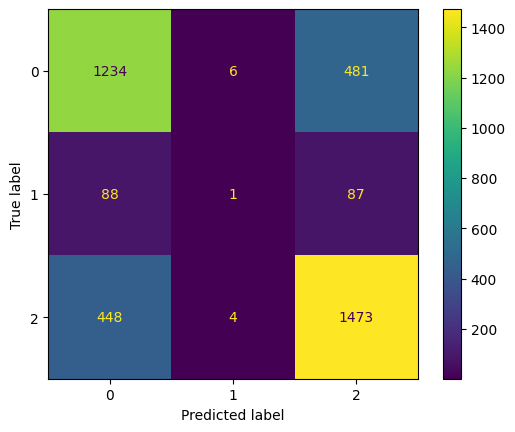

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Limited Predictive Model (Turns and Moves are removed): 

In [31]:
x = list(zip(rated, time_increment, white_rating, black_rating, opening_moves, opening_shortname, opening_response, opening_variation))
y = list(winner)

num_folds = 5
seed = 7
scoring = 'accuracy'

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=seed)

np.shape(x_train), np.shape(x_test)

((15287, 8), (3822, 8))

In [32]:
results = []
names=[]
print("Performance on training set:")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on training set:
DT: 0.525741 (0.007568)

NB: 0.598613 (0.005649)

SVM: 0.620658 (0.003611)

GBM: 0.618107 (0.007265)

RF: 0.595277 (0.005999)



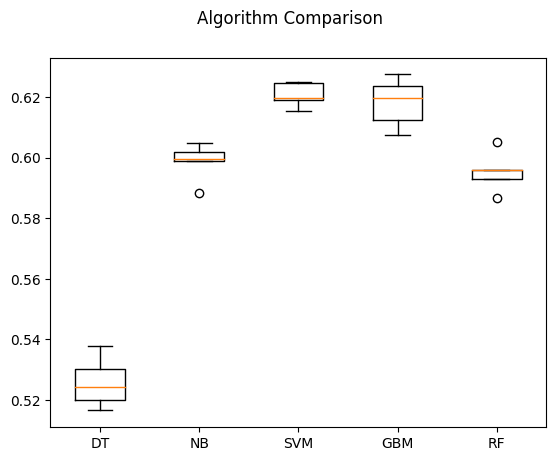

In [33]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [40]:
best_model = sv
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best model accuracy on test set:", accuracy_score(y_test, y_pred))

Best model accuracy on test set: 0.6216640502354788


Limited Model Evaluation 1: Classification Report

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58      1721
           1       0.00      0.00      0.00       176
           2       0.62      0.76      0.68      1925

    accuracy                           0.62      3822
   macro avg       0.42      0.43      0.42      3822
weighted avg       0.59      0.62      0.60      3822



Limited Model Evaluation 2: Confusion Matrix

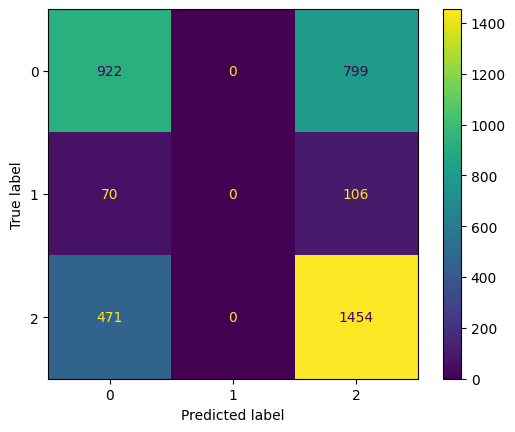

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()